# Descripcion del proyecto 

El departamento de analítica de Showz, una empresa de venta de entradas de eventos. Solicita ayuda para optimizar los gastos de marketing.

1. Cuentas con:

* registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
* un archivo con los pedidos en este periodo;
* estadísticas de gastos de marketing.


2. Lo que vas a investigar: 

* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.

## Diccionario de datos

1) La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

* Uid: identificador único del usuario.
* Device: dispositivo del usuario.
* Start Ts: fecha y hora de inicio de la sesión.
* End Ts: fecha y hora de término de la sesión.
* Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
  Todas las fechas de esta tabla están en formato AAAA-MM-DD.

2) La tabla orders (datos sobre pedidos):

* Uid: identificador único del usuario que realiza un pedido.
* Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

3) La tabla costs (datos sobre gastos de marketing):

* source_id: identificador de la fuente de anuncios.
* dt: fecha.
* costs: gastos en esta fuente de anuncios en este día.

## Acceso a datos y prepararlos para el análisis 

In [1]:
# importar librerias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# cargar Df
df_visits = pd.read_csv('./datasets/visits_log_us.csv')
df_orders = pd.read_csv('./datasets/orders_log_us.csv')
df_costs = pd.read_csv('./datasets/costs_us.csv')

In [3]:
# declarar funcion para obtener informacion de los DF

def leer_data(data):
    print(data.head())
    print(data.info())
    print(data.describe())

### DataSet visitas 

In [4]:
# analizar los datos del DF
leer_data(df_visits)

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage

In [5]:
# declarar funcion para limpiar los datos 
def limpiar_datos(data):
    new_columns = []
    for columna in data.columns:
        columna_limpia = columna.lower().replace(' ', '_')
        new_columns.append(columna_limpia)
    data.columns = new_columns

    return print(data.head())
    

In [6]:
limpiar_datos(df_visits)

    device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [7]:
# funcion para obtener duplicados y ausentes 
def valores_df(data):
    valores_duplicados = data.duplicated().sum()
    valores_ausentes = data.isna().sum()
    print(f'Los valores duplicados del DF son: {valores_duplicados}')
    print(f'Los valores ausentes del DF son: {valores_ausentes}')

In [8]:
valores_df(df_visits)

Los valores duplicados del DF son: 0
Los valores ausentes del DF son: device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


In [9]:
# cambiar el tipo de dato de las columnas End Ts y Start Ts a datetime

df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])

df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])

<span style="color:blue; font-weight:bold">
Al revisar el DF visits no se encontraron valores nulos, ni duplicados. Se modificaron las columnas End Ts y Start Ts debido a que contaban con datos tipo object y estos son necesarios que esten en tipo Datetime para realizar los informes y metricas. Ademas se hicieron los nombres de las columnas minusculas para optimizar su uso.
</span>

### DataSet pedidos 

In [10]:
# leer los datos del DF
leer_data(df_orders)

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


In [11]:
# llamar a la funcion limpiar datos para corregir el nombre de las columnas 
limpiar_datos(df_orders)

                buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [12]:
# llamar a la funcion valores df para conocer los valores duplicados y ausentes
valores_df(df_orders)

Los valores duplicados del DF son: 0
Los valores ausentes del DF son: buy_ts     0
revenue    0
uid        0
dtype: int64


In [13]:
# Cambiar el tipo de datos de la columna Buy Ts a Date Time 
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

<span style="color:blue; font-weight:bold">
Al revisar el DF orders no se encontraron valores nulos, ni duplicados. Se modifico la columna Buy Ts debido a que cuenta con datos tipo object y estos son necesarios que esten en tipo Datetime para realizar los informes y metricas
</span>

### DataSet gastos

In [14]:
# leer los datos del DF
leer_data(df_costs)

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


In [15]:
# llamar a la funcion valores df para conocer los valores duplicados y ausentes
valores_df(df_costs)

Los valores duplicados del DF son: 0
Los valores ausentes del DF son: source_id    0
dt           0
costs        0
dtype: int64


In [16]:
# cambiar el tipo de dato de la columna dt a Datetime
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

<span style="color:blue; font-weight:bold">
Al revisar el DF costs no se encontraron valores nulos, ni duplicados. Se modifico la columna dt debido a que cuenta con datos tipo object y estos son necesarios que esten en tipo Datetime para realizar los informes y metricas
</span>

## Informes y métricas 

### Cuantas personas lo usan cada dia, semana y mes ?


In [17]:
# extraer meses 
df_visits['session_month'] = df_visits['start_ts'].dt.month

# extraer semana
df_visits['session_week'] = df_visits['start_ts'].dt.isocalendar().week

# crear una columna con fechas sin horas 
df_visits['session_date'] = df_visits['start_ts'].dt.date

### Cuantas sesiones por dia hay? (un usuario puede tener más de una sesión)

In [18]:
visitas_por_dia = df_visits.groupby('session_date')['uid'].nunique().sort_index()
visitas_por_dia_mean = round(visitas_por_dia.mean())

# visitas promedio por dia 
print('Visitas promedio por dia: ', visitas_por_dia_mean - 1)

Visitas promedio por dia:  907


### Cuantas visitas por semana hay?

In [19]:
visitas_por_semana = df_visits.groupby('session_week')['uid'].nunique().sort_index()
visitas_por_semana_mean = round(visitas_por_semana.mean())
# visitas promedio por semana 
print('Visitas promedio por semana: ', visitas_por_semana_mean -1)

Visitas promedio por semana:  5824


### Cuantas visitas al mes hay?

In [20]:
# cuantas visitas al mes ? 
visitas_por_mes = df_visits.groupby('session_month')['uid'].nunique().sort_index()
visitas_por_mes_mean = round(visitas_por_mes.mean())

# visitas promedio por mes
print('Visitas promedio por mes: ', visitas_por_mes_mean -1)

Visitas promedio por mes:  23227


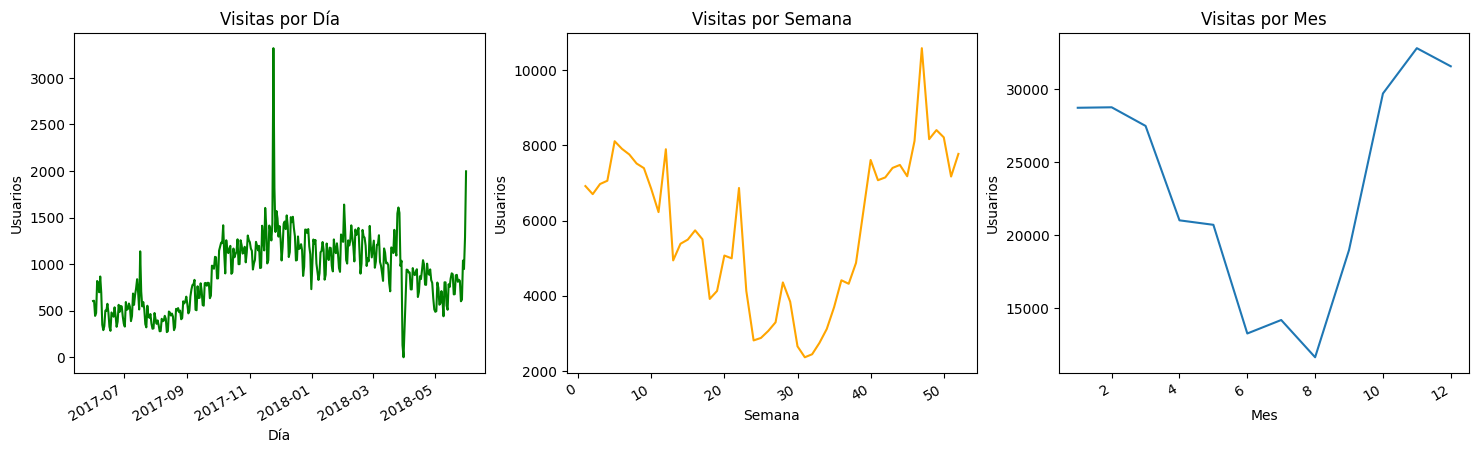

In [21]:
# crear grafico de visitas por dia, semana y mes 
fig, ax = plt.subplots(1,3,figsize=(18,5))

ax[0].plot(visitas_por_dia, color='green')
ax[0].set(title='Visitas por Día', xlabel='Día', ylabel='Usuarios')
ax[1].plot(visitas_por_semana, color='orange')
ax[1].set(title='Visitas por Semana', xlabel='Semana', ylabel='Usuarios')
ax[2].plot(visitas_por_mes)
ax[2].set(title='Visitas por Mes', xlabel='Mes', ylabel='Usuarios')
fig.autofmt_xdate(rotation=30)
plt.show()

<span style="color:blue; font-weight:bold">
Al analizar los datos del dataframe visits se observa en la grafica de visitas por dia hay un aumento considerable en las fechas de noviembre de 2017 y diciembre del mismo año esto podria explicarse porque en estas fechas las personas aprovechan sus vacaciones para poder acudir a eventos, esto se puede comprobar con los siguientes graficos de semanas y mes, ya que las tendencias son las mismas, es decir, incrementan en la semana 49 aprox y en el mes 11. 
</span>

### cual es la duración promedio de cada sesión ? 

In [22]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds

mean_session = df_visits['session_duration_sec'].mean()
mean_session_min = round(mean_session / 60)
print(f'La duración promedio de sesiones es de: {mean_session_min} minutos aproximadamente')

La duración promedio de sesiones es de: 11 minutos aproximadamente


### calcular ASL para graficar el tiempo que los usuarios pasan en promedio en cada sesion.


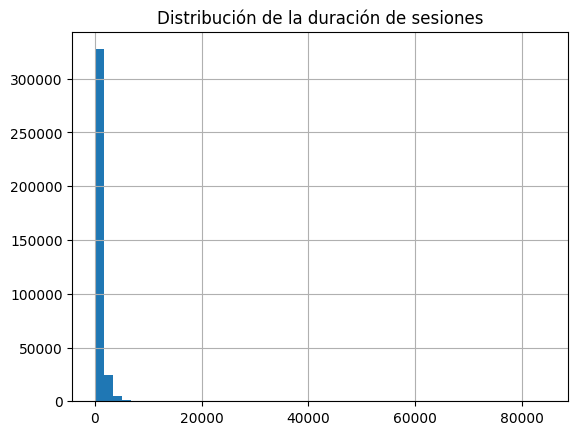

In [23]:
df_visits['session_duration_sec'].hist(bins=50)
plt.title('Distribución de la duración de sesiones')
plt.show()

In [24]:
mediana_visits = df_visits['session_duration_sec'].median()
print(mediana_visits)

300.0


In [25]:
moda_visits = df_visits['session_duration_sec'].mode()
print(moda_visits)

0    60
dtype: int64


<span style="color:blue; font-weight:bold">
Al revisar el ASL se encontro que en promedio los usuarios que visitan el sitio mantienen una sesion activa de 643.5 segundos o de 10 a 11 min aproximadamente. esto podria indicar que los usuarios tienen interes en el sitio, ya que es alto el tiempo el que permanecen activos
</span>

### Calcular la tasa de retención de usuarios

In [26]:
# extraer las primeras visitas
primeras_visitas = df_visits.groupby('uid')['start_ts'].min()

In [27]:
# renombrar columnas 
primeras_visitas.name = 'first_activity_date'

In [28]:
# unir DataFrames para de primeras visitas con el DF original
df_visits = df_visits.join(primeras_visitas, on='uid')

In [29]:
# calcular el inicio de mes por cada fecha de actividad
df_visits['activity_month'] = df_visits['start_ts'].dt.to_period('M').dt.to_timestamp()


In [30]:
# calcular el inicio de mes para la primer fecha de actividad de cada usuario
df_visits['first_activity_month'] = df_visits['first_activity_date'].dt.to_period('M').dt.to_timestamp()

In [31]:
# calcular el ciclo de vida de la cohorte
df_visits['cohort_lifetime']= (
    df_visits['activity_month'].dt.year - df_visits['first_activity_month'].dt.year) * 12 + (
    df_visits['activity_month'].dt.month - df_visits['first_activity_month'].dt.month)

In [32]:
cohortes = (
    df_visits.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid':'nunique'})
    .reset_index()
)

In [33]:
# filtro del numero de usuarios observados en cada cohorte (ciclo de vida 0) 
users_count = cohortes[cohortes['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
]

In [34]:
# renombrar columna uid por cohort users
users_count = users_count.rename(columns={'uid':'cohort_users'})

In [35]:
# unir DF de cohortes con el users count
cohortes = cohortes.merge(users_count, on='first_activity_month')

In [36]:
# calcular la tasa de retencion dividir usuarios activos por el número de usuarios iniciales en la corhorte
cohortes['retention'] = cohortes['uid'] / cohortes['cohort_users']

In [37]:
# crear una pivot table
retention_pivot = cohortes.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

In [38]:
# rellenar espacios vacios
retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02-01,1.0,0.05708,0.025454,0.020093,,,,,,,,


### Mapa de calor de la tasa de retención de usuarios

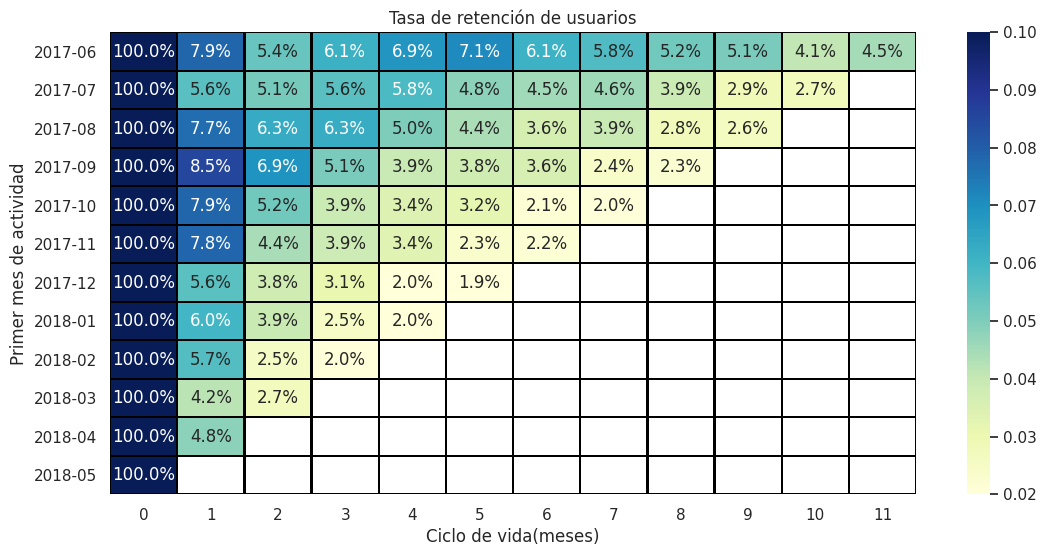

In [39]:
sns.set(style='white')

plt.figure(figsize=(13,6))
plt.title('Tasa de retención de usuarios')

# convertir a datetime
retention_pivot.index = pd.to_datetime(retention_pivot.index, errors='coerce')
# simplificar el formato del eje Y
retention_pivot.index = retention_pivot.index.strftime('%Y-%m')

sns.heatmap(
    retention_pivot,
    annot=True, 
    fmt='0.1%', 
    linewidths=1, 
    linecolor='black', 
    cmap='YlGnBu', 
    vmin=0.02,
    vmax=0.10
)
plt.xlabel('Ciclo de vida(meses)')
plt.ylabel('Primer mes de actividad')
plt.show()

<span style="color:blue; font-weight:bold">
Para calcular la frecuencia en que los usuarios regresan a la plataforma se opto por calcular la tasa de retencion en donde se observa que durante los meses de Junio, Agosto, Septiembre, Octubre y Noviembre de 2017 se logro una buena retencion durante el primer y segundo mes del ciclo de vida, a partir del tercer mes de ciclo de vida ya empieza a disminuir la tasa, excepto en la cohorte del mes de Junio de 2017. donde se mantiene con un buen porcentaje hasta el noveno mes del ciclo de vida.
</span>

##  Ventas

### Cuándo empieza la gente a comprar 


In [40]:
# conocer la primer visita del usuario
primer_visita = df_visits.groupby(['uid', 'source_id'])['start_ts'].min().reset_index()

primer_visita.columns= ['uid', 'source_id', 'first_visit']
                                   

In [41]:
# conocer la fecha de la primera compra del usuario 

# primer pedido
primer_pedido = df_orders.groupby('uid')['buy_ts'].min().reset_index()

primer_pedido.columns= ['uid', 'first_order']

In [42]:
# unir tablas para calcular el tiempo de conversion 
tabla_conversion = primer_visita.merge(primer_pedido, on='uid', how='left')

# calcular los dias que tardo un usuario en convertirse en cliente
tabla_conversion['days_to_convert'] = (tabla_conversion['first_order'] - tabla_conversion['first_visit']).dt.days

In [43]:
# filtrar a los usuarios que se convirtieron 
conversion = tabla_conversion[~tabla_conversion['days_to_convert'].isna()]

print(conversion['days_to_convert'].mean())

2.1880031432812364


<span style="color:blue; font-weight:bold">
Hasta este punto los usuarios que tuvieron una conversion a clientes en promedio tardan 2 dias desde su primer visita al sitio
</span>

In [44]:
# calcular la conversion de canales de marketing 
conversion_mkt = conversion.groupby('source_id')['uid'].count() / primer_visita.groupby('source_id')['uid'].count()
conversion_mkt = conversion_mkt * 100

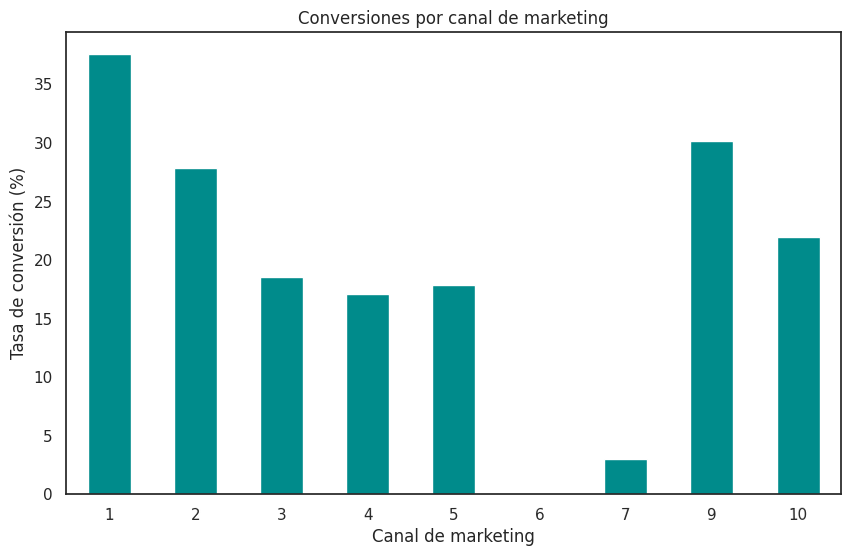

In [45]:
plt.figure()
conversion_mkt.plot(
    title='Conversiones por canal de marketing',
    xlabel='Canal de marketing', 
    ylabel='Tasa de conversión (%)',
    kind='bar', 
    color='darkcyan',
    rot=1, 
    figsize=(10,6))

plt.show()

<span style="color:blue; font-weight:bold">
Al comparar las conversiones de los clientes opte por enfocarme en los canales de marketing y esto dio como resultado la siguiente grafica en donde se muestra que el canal 1 es el mas efectivo haciendo conversiones a que tiene aproximadamente un 38% de efectividad, seguido del cananl 9 el cual tiene un 30% de tasa de conversion y en tercer lugar se encuentra el canal 2 con un poco mas del 27% de tasa de conversion. Sin embargo no todos los canales son buenos para la tasa de conversion, tal es el caso del canal 6 donde no se obtuvo un resultado favorable. 
</span>

### Cuantos pedidos se realizan durante un periodo de tiempo


In [46]:
# periodo de tiempo
start_date = '2017-06-01'
end_date = '2018-06-01'

# filtrar rango de fechas 
filtro_orders = df_orders[(df_orders['buy_ts'] >= start_date) & (df_orders['buy_ts'] <= end_date)]

# agrupar pedidos por mes 
order_month = filtro_orders.groupby(filtro_orders['buy_ts'].dt.to_period('M'))['uid'].count()

print(order_month)

buy_ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
Freq: M, Name: uid, dtype: int64


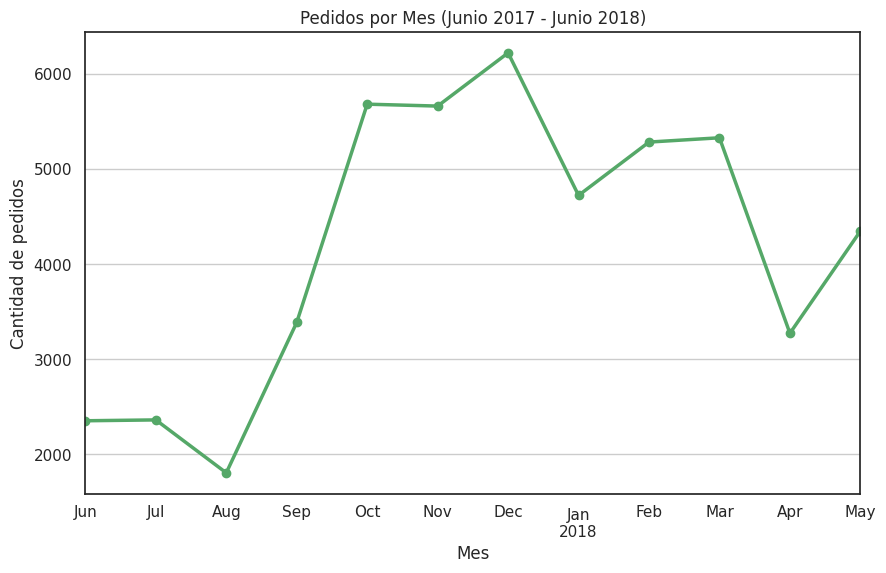

In [47]:
# graficar un lineplot para mostrar los pedidos realizados
order_month.plot(
    title= 'Pedidos por Mes (Junio 2017 - Junio 2018)',
    xlabel='Mes',
    ylabel='Cantidad de pedidos', 
    kind='line',
    marker='o',
    figsize=[10,6], 
    color='g', 
    linewidth=2.5)

plt.grid(axis='y')
plt.show()

<span style="color:blue; font-weight:bold">
Para los pedidos realizados durante un periodo decidi tomar desde el inicio de los datos hasta el fin esto con la finalidad de tener un mejor panorama acerca de las compras que realizan los clientes, con base en esto se obtuvo la anterior grafica donde nuevamente las mayores cantidades de pedidos ocurren desde Octubre manteniendose en Noviembre e incrementando en Diciembre, posterior a ello los pedidos bajan considerablemente en enero, se mantienen en febrero y marzo pero despues vuelven a descender.

</span>

### Tamaño promedio de compra por usuario


In [48]:
compras_usuario = df_orders.groupby('uid')['revenue'].sum().reset_index(name='total_compras')

# Calcular el promedio de compra por usuario
promedio_compras_usuario = round(compras_usuario['total_compras'].mean())

print('Las compras promedio por usuario son:', promedio_compras_usuario)

Las compras promedio por usuario son: 7


In [49]:
# compra promedio por dia 
buys_day = df_orders.groupby(df_orders['buy_ts'].dt.to_period('D'))['revenue'].sum()

mean_day = buys_day.mean().round(2)

print(f'El tamaño promedio de compra por día es de: ${mean_day}')

El tamaño promedio de compra por día es de: $692.46


In [50]:
# compra promedio por semana 
buys_week = df_orders.groupby(df_orders['buy_ts'].dt.to_period('W'))['revenue'].sum()

mean_week = buys_week.mean().round(2)

print(f'El tamaño promedio de compra por semana es de: ${mean_week}')

El tamaño promedio de compra por semana es de: $4755.8


In [51]:
# compra promedio por mes 

buys_month = df_orders.groupby(df_orders['buy_ts'].dt.to_period('M'))['revenue'].sum()

mean_month = buys_month.mean().round(2)

print(f'El tamaño promedio de compra por día es: ${mean_month}')

El tamaño promedio de compra por día es: $19389.02


### Calcular el LTV de las ventas 


In [52]:
# extraer meses de orders 
df_orders['order_months'] = df_orders['buy_ts'].astype('datetime64[M]')

# primer compra de cada cliente
first_order = df_orders.groupby('uid').agg({'order_months' : 'min'}).reset_index()
first_order.columns= ['uid', 'first_order_month']

In [53]:
# numero de clientes nuevos para cada mes
cohort_size = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.columns = ['first_order_month','new_buyers']

In [54]:
# crear cohorts y unirlas 
orders = pd.merge(df_orders, first_order, on = 'uid')

In [55]:
# agrupar tabla de pedidos por mes y la primera compra, sumar los ingresos 
cohorts = orders.groupby(['first_order_month', 'order_months']).agg({'revenue':'sum'}).reset_index()

In [56]:
# unir las tablas de cohort_size y cohorts por la columna first_order_month
reporte = pd.merge(cohort_size, cohorts, on ='first_order_month')

In [57]:
# crear columna de edad de la cohorte 
reporte['age'] = (reporte['order_months'] - reporte['first_order_month']) / np.timedelta64(1, 'M')

# se redondea y se convierte a int 
reporte['age'] = reporte['age'].round().astype('int')

In [58]:
# calcular LTV
reporte['ltv'] = reporte['revenue'] / reporte ['new_buyers']

In [59]:
reporte

,first_order_month,new_buyers,order_months,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [60]:
# crear tabla pivot 
tabla = reporte.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

In [61]:
tabla = tabla.fillna('')

In [62]:
tabla = tabla.apply(pd.to_numeric, errors='coerce')

<span style="color:blue; font-weight:bold">
En cuanto al calculo de LTV se realizo un análisis de cohortes considerando la primer orden hecha con las posteriores ordenes, sin embargo al no conocer el margen de la rentabilidad considere los beneficios brutos y esto fue dividido entre los compradores, con el fin de obtener el LTV, sin embargo al observar la tabla no se muestran los resultados esperados, por lo cual mas adelante se tendra en cuenta para las recomendaciones a los expertos en marketing
</span>

### Mapa de calor del LTV

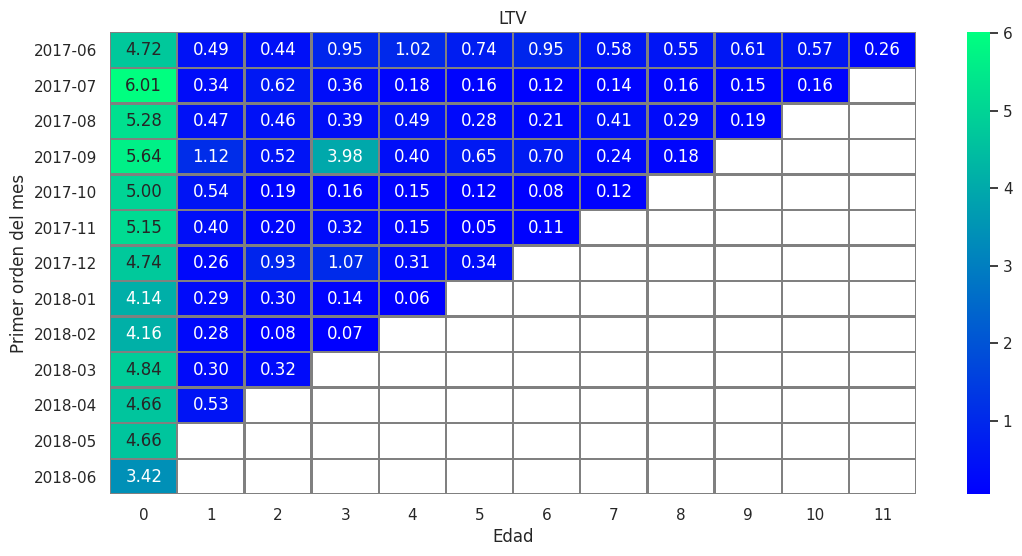

In [63]:
sns.set(style='white')

plt.figure(figsize=(13,6))
plt.title('LTV')

# convertir a datetime
tabla.index = pd.to_datetime(tabla.index, errors='coerce')
# simplificar el formato del eje Y
tabla.index = tabla.index.strftime('%Y-%m')

sns.heatmap(
    tabla,
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray', 
    cmap='winter', 
    
)
plt.xlabel('Edad')
plt.ylabel('Primer orden del mes')
plt.show()

<span style="color:blue; font-weight:bold">
Al revisar el mapa de calor donde se calculo el LTV se observa algo no esperado ya que el dinero que el cliente aporta a la empresa al realizar las compras a lo largo del ciclo de vida es bajo, solo al principio del ciclo de vida es cuando se observan promedios buenos, sin embargo a partir del segundo mes estos ingresos bajan considerablemente.
</span>

## Marketing

### Cuanto dinero se gastó ? (Gasto Total )


In [64]:
gasto_total = df_costs['costs'].sum()
print(f'El gasto total es: ${gasto_total}')

El gasto total es: $329131.62


 
### Cuanto dinero se gastó ? (Gasto por fuente de adquisicion)

In [65]:
gasto_por_fuente = df_costs.groupby('source_id')['costs'].sum().reset_index()
print(gasto_por_fuente)

   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


<Figure size 640x480 with 0 Axes>

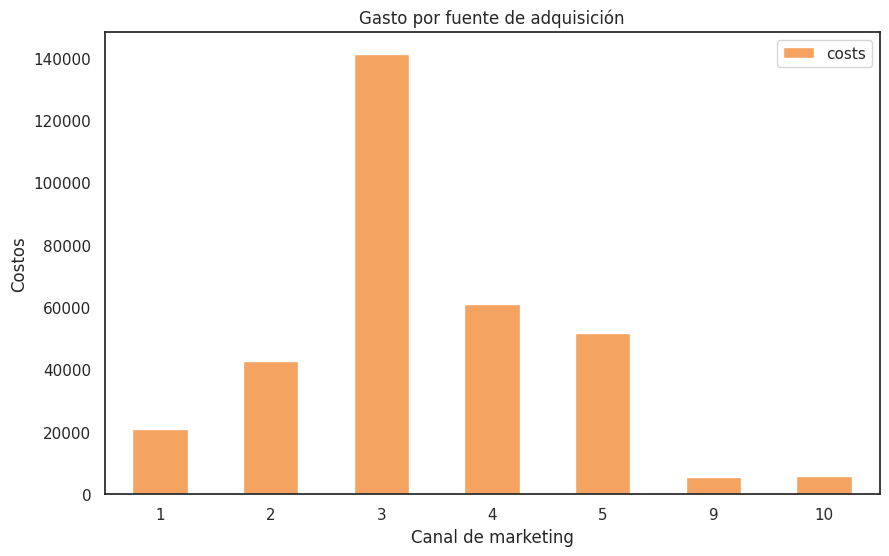

In [66]:
# grafico de barras para el gasto por fuente de adquisicion
plt.figure()

gasto_por_fuente.plot(
    title='Gasto por fuente de adquisición',
    x='source_id',
    xlabel='Canal de marketing', 
    ylabel='Costos',
    kind='bar', 
    rot=1, 
    color='sandybrown',
    figsize=(10,6))

plt.show()

<span style="color:blue; font-weight:bold">
Al revisar los costos de los canales de marketing se obtuvo que el canal con mayor gasto es el 3, sin embargo al contrastarlo con la tabla de conversiones (mostrada previamente), se puede mencionar que este canal es de los que menos conversiones tiene. Por otra parte el canal 1, 9 y 2 tienen un menor gasto y son los 3 principales canales en la tasa de conversión por lo cual seria una mejor opcion destinar un mayor gasto a estos canales. 
</span>

### Cuanto dinero se gastó ? (Gasto a traves del tiempo) 


In [67]:
# crear una columna llamada month y extraer los meses 
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')

# gasto de cada mes
monthly_month = df_costs.groupby('month').sum()

# agregar los datos sobre costos al informe y calcular el cac 
report = pd.merge(reporte, monthly_month, left_on='first_order_month', right_on='month')

# crear columna con el calculo mensual
report['cac'] = report['costs'] / report['new_buyers']

print(report.head())

  first_order_month  new_buyers order_months  revenue  age       ltv  \
0        2017-06-01        2023   2017-06-01  9557.49    0  4.724414   
1        2017-06-01        2023   2017-07-01   981.82    1  0.485329   
2        2017-06-01        2023   2017-08-01   885.34    2  0.437637   
3        2017-06-01        2023   2017-09-01  1931.30    3  0.954671   
4        2017-06-01        2023   2017-10-01  2068.58    4  1.022531   

   source_id    costs       cac  
0       1020  18015.0  8.905091  
1       1020  18015.0  8.905091  
2       1020  18015.0  8.905091  
3       1020  18015.0  8.905091  
4       1020  18015.0  8.905091  


### Gráfico comparativo entre el LTV y el CAC

In [68]:
ltv_cac = report.groupby('age')['ltv','cac'].sum().reset_index()
ltv_cac

,age,ltv,cac
0,0,59.001871,109.768288
1,1,5.011012,102.330446
2,2,4.054983,92.537221
3,3,7.445011,83.928314
4,4,2.769131,74.965556
5,5,2.334444,65.028253
6,6,2.182663,56.286444
7,7,1.487039,46.997574
8,8,1.190663,38.628247
9,9,0.940912,29.186592


<Figure size 640x480 with 0 Axes>

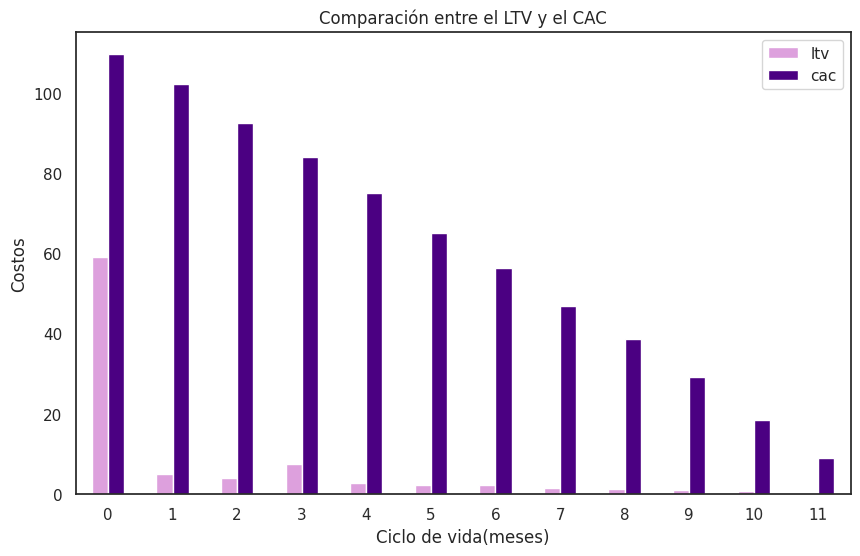

In [69]:
# grafica comparativa del ltv con el cac 

plt.figure()

ltv_cac.plot(x='age',
             title='Comparación entre el LTV y el CAC',
             xlabel='Ciclo de vida(meses)', 
             ylabel='Costos',
             kind='bar',  
             figsize=(10,6),
             color=['plum','indigo'])

plt.xticks(rotation=1)
plt.show()

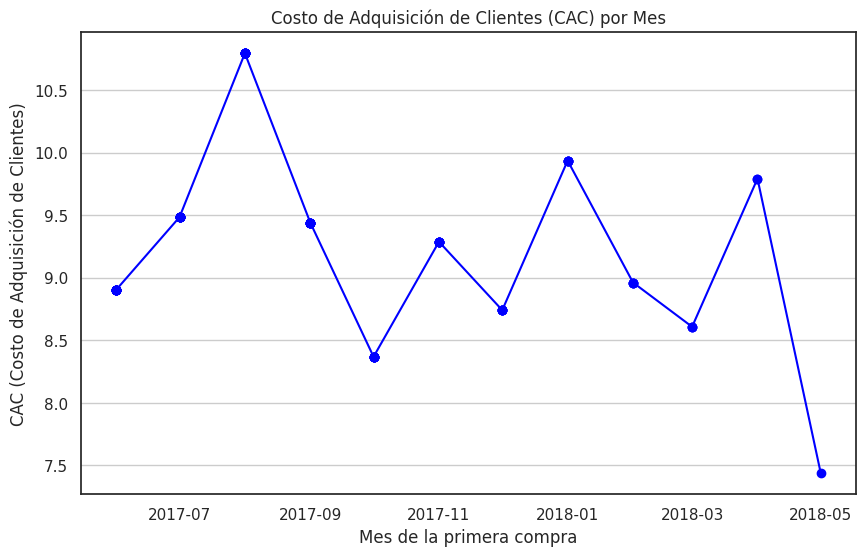

In [70]:
# graficar un lineplot 
plt.figure(figsize=(10,6))

# Graficar el CAC por mes
plt.plot(report['first_order_month'], report['cac'], marker='o', color='blue', label='CAC')
plt.title('Costo de Adquisición de Clientes (CAC) por Mes')
plt.xlabel('Mes de la primera compra')
plt.ylabel('CAC (Costo de Adquisición de Clientes)')
plt.grid(axis='y')

plt.show()

<span style="color:blue; font-weight:bold">
Al analizar el costo de adquisicion por cliente a traves del tiempo se encontro que el LTV es menor al CAC por lo cual esto ya es un indicador negativo, ya que es mas el gasto de adquisicion de los clientes como se observa en el grafico de lineas en donde, hay meses en los cuales este costo baja, sin embargo no es claro que tenga una tendencia a la baja, solo esto sucede al final del periodo de los datos. 
</span>

### CAC de clientes por cada una de las fuentes de adquisicion 

In [71]:
# agrupar los canales de adquisicion por los clientes adquiridos
clientes_por_fuente = df_visits.groupby('source_id').agg({'uid' : 'nunique'}).reset_index()
clientes_por_fuente.columns =['source_id', 'n_buyers']

# sumar los costos de adquisicion por cada fuente 
costo_por_fuente = df_costs.groupby('source_id')['costs'].sum().reset_index()
costo_por_fuente.columns = ['source_id', 'total_costs']

# unir los clientes adquiridos por costo
cac_por_fuente = pd.merge(clientes_por_fuente, costo_por_fuente, on='source_id')

# calcular el CAC 
cac_por_fuente['cac'] = cac_por_fuente['total_costs'] / cac_por_fuente['n_buyers']

print(cac_por_fuente)

   source_id  n_buyers  total_costs       cac
0          1     18999     20833.27  1.096546
1          2     26245     42806.04  1.631017
2          3     74756    141321.63  1.890439
3          4     83525     61073.60  0.731201
4          5     56974     51757.10  0.908434
5          9      9264      5517.49  0.595584
6         10      8067      5822.49  0.721766


<Figure size 640x480 with 0 Axes>

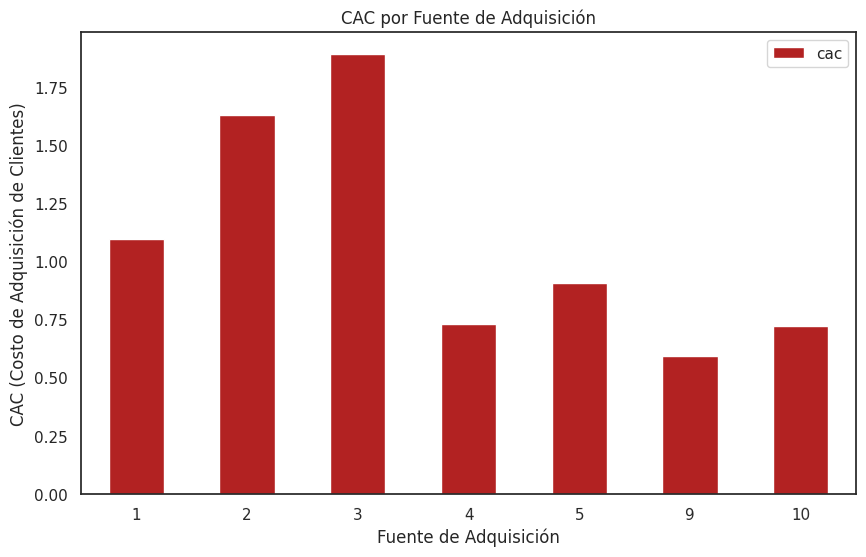

In [72]:
# graficar el CAC de clientes por fuente de adquisicion
plt.figure()
cac_por_fuente.plot(title='CAC por Fuente de Adquisición',
                    x='source_id',
                    y='cac',
                    xlabel='Fuente de Adquisición',
                    ylabel='CAC (Costo de Adquisición de Clientes)',
                    kind='bar',
                    color='firebrick', 
                    rot=1,
                    figsize=(10,6))

plt.show()

<span style="color:blue; font-weight:bold">
En el grafico de CAC por fuente de adquisicion observamos que nuevamente el canal 3 es el que mas costos genera, y como previamente se habia mencionado, es un de los canales que presenta una tasa de conversion baja. Por otra parte el canal 1 tambien presenta un alto costo, sin embargo este canal tiene mas de un 35% de tasa de conversion, asimismo el canal 9, siendo el top 2 de los canales con mayor porcentaje de tasa de conversion presenta un costo menor, por lo cual se podria considerar para darle un mayor gasto y traer clientes nuevos en un futuro. 
</span>

### ¿Cuán rentables eran las inversiones? (ROMI)

In [73]:
# obtener el romi diviendo ltv entre cac 
report['romi'] = report['ltv'] / report['cac']

# crear tabla dinamica donde se muestre el romi
tabla_romi = report.pivot_table(
    index='first_order_month',
    columns='age', 
    values='romi', 
    aggfunc='mean')

tabla_romi.fillna('')

# calcular la suma acumulativa
tabla_romi = tabla_romi.cumsum(axis=1).round(2)

### Mapa de calor  ROMI

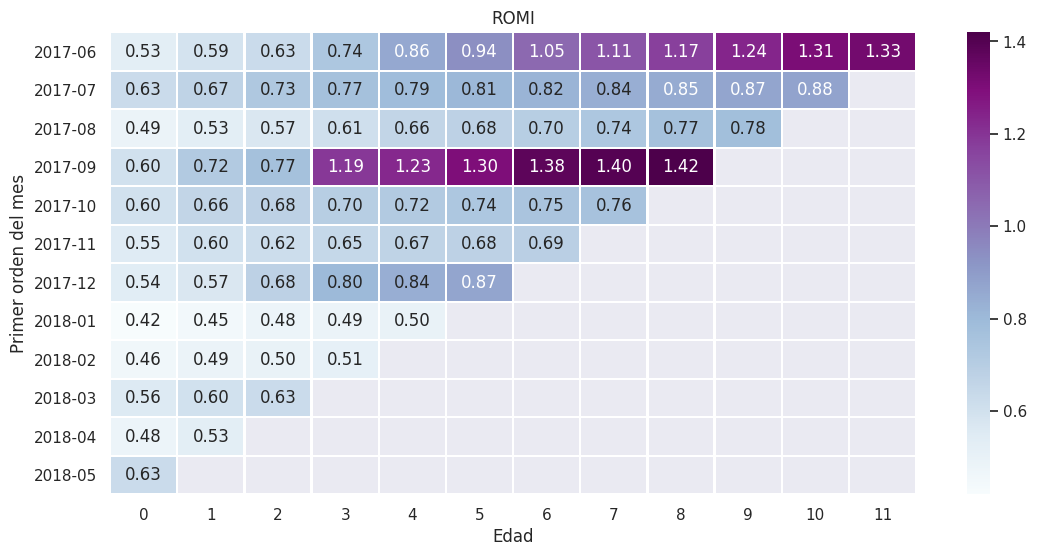

In [74]:
sns.set(style='darkgrid')

# Crear la figura y el heatmap
plt.figure(figsize=(13, 6))
plt.title('ROMI')

# convertir a datetime
tabla_romi.index = pd.to_datetime(tabla_romi.index, errors='coerce')
# simplificar el formato del eje Y
tabla_romi.index = tabla_romi.index.strftime('%Y-%m')

# Generar el heatmap con seaborn
sns.heatmap(
    tabla_romi,
    annot=True,
    fmt='.2f',  # Mostrar dos decimales
    linewidths=1,
    linecolor='white',
    cmap='BuPu'
)
plt.xlabel('Edad')
plt.ylabel('Primer orden del mes')
plt.show()

<span style="color:blue; font-weight:bold">
En el mapa de calor se observa que la mayoria de las cohortes tienen un buen retorno de inversion a partir de los primeros meses del ciclo de vida, lo que indica que los canales de marketing estan teniendo buenos resultados ya que en la mayoria de las cohortes es rentable
</span>

In [75]:
# promediar los valores en cada columna
romi_acomulada = tabla_romi.cumsum(axis=1).mean(axis=0).round(3)

romi_acomulada

age
0      0.541
1      1.115
2      1.755
3      2.469
4      3.316
5      4.316
6      5.217
7      6.338
8      7.572
9      7.723
10     9.415
11    11.500
dtype: float64

<span style="color:blue; font-weight:bold">
Por ultimo al calcular el romi se observa que a partir del 3 mes se tiene un retorno de inversion en el marketing, esto podria indicar que no corre algun peligro en la inversion a los canales de marketing, sin embargo con los hallazgos previos, es necesario centrarse en aquellos canales que tienen una mayor tasa de retención y un menor costo, tal es el caso del canal 9 y el 1. 
</span>

## Conclusion general 

<span style="color:blue; font-weight:bold">
Durante este análisis, se identificaron puntos clave que los expertos en marketing deberían priorizar. En primer lugar, se observó que los canales de adquisición 1, 9 y 2 presentaron las tasas de retención más altas, con el canal 9 destacando por su eficiencia en términos de costo y conversión. En cambio, el canal 3 mostró una tasa de conversión inferior al 20%, lo que lo posiciona como el menos efectivo.

Al analizar los costos de adquisición, se observó que el canal 9 no solo genera los menores gastos, sino que también tiene el CAC más bajo. El canal 1, aunque es el que ofrece la mejor tasa de conversión, presenta costos y CAC elevados. El canal 3, por otro lado, no solo tiene la menor tasa de conversión, sino que además genera los mayores gastos y el CAC más alto, lo que evidencia un mal rendimiento.

Un hallazgo importante es que el canal 9 podría ser una excelente opción para concentrar la inversión de marketing, en lugar de continuar con gastos en el canal 3, que está generando pérdidas al tener un LTV inferior al CAC.

Este análisis empleó métricas clave, como la tasa de conversión y el CAC, para evaluar el rendimiento de los canales de adquisición. Los resultados demuestran la importancia de reasignar el presupuesto a los canales que ofrecen mejores retornos, como el canal 9, y reducir la inversión en aquellos que están causando pérdidas. 
La empresa esta presentando perdidas aun cuando el numero de visitantes, el numero de sesiones activas y el porcentaje de tasa de conversion son altas en algunos canales.
</span>